In [1]:
import saspy
sas = saspy.SASsession()

import pandas as pd
import numpy as np

Using SAS Config named: oda
SAS Connection established. Subprocess id is 8248



* logistic regression

In [2]:
%%SAS sas

libname l '/home/u49467254/CRM';

proc logistic data=l.train_ready desc outmodel= model0;
class grade (ref = 'A') purpose_new (ref = 'purpose_credit_card')
 home_ownership_new (ref = 'home_ownership_AONO') initial_list_status (ref = 'f')
verification_status_new (ref = 'verf_stat_Source_Verified') term_int (ref = '0')
int_rate_new (ref= 'int_GT_20.9') msid_new (ref= 'msid_GE_58.5') / param= reference;
model bad (event = '1') = grade purpose_new home_ownership_new verification_status_new  
int_rate_new  msid_new initial_list_status term_int;
run;

* based on the above result we will not reject any variable from the model.  
now we will run the model over the test dataset.


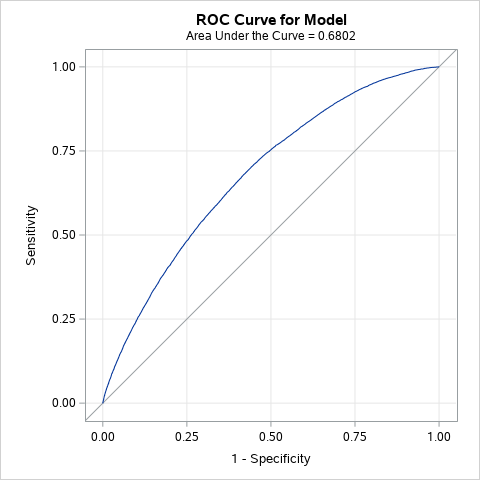

In [3]:
%%SAS sas

proc logistic data=l.test_ready desc outmodel= model0 plots(only)=roc PLOTS(MAXPOINTS=NONE);
class grade (ref = 'A') purpose_new (ref = 'purpose_credit_card')
 home_ownership_new (ref = 'home_ownership_AONO') initial_list_status (ref = 'f')
verification_status_new (ref = 'verf_stat_Source_Verified') term_int (ref = '0')
int_rate_new (ref= 'int_GT_20.9') msid_new (ref= 'msid_GE_58.5') / param= reference;
model bad (event = '1') = grade purpose_new home_ownership_new verification_status_new  
int_rate_new  msid_new initial_list_status term_int / lackfit;
score  clm  data= l.test_ready out=pred_scores;
run;

* our model was fair enough to be considered.  
next we will observe the confusion matrix.

In [5]:
%%SAS sas

data loan_scores;
set pred_scores (keep=id bad P_1 );
if P_1 ge 0.25 then bad_hat = 1; 
if P_1 lt 0.25 then bad_hat = 0;
run;

proc freq data=loan_scores;
tables bad*bad_hat / norow nocol;
run;